<a href="https://colab.research.google.com/github/jorge-flores-py/PROCESAMIENTO-DE-HABLA-IAPH/blob/main/TP1_webscrapping_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA

**Jorge Flores.**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [51]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# URL del artículo
url = 'https://culturizando.com/grandes-discurso-peter-dinklage/'

# Hacemos la solicitud HTTP
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extraemos todo el texto de los párrafos juntos
paragraphs = soup.find_all('p')
texto_completo = "\n\n".join(p.get_text(strip=True) for p in paragraphs)

# Frases delimitadoras
inicio_frase = "Lo que hagas en tu vida debe ser para encontrarte"
fin_frase = "Algunas personas jamás lo encuentran… Pero tú lo harás. Te lo prometo. Ya llegaste hasta aquí y eso es un paso gigantesco por sí mismo"

# Buscar las posiciones de inicio y fin dentro del texto completo
inicio_idx = texto_completo.find(inicio_frase)
fin_idx = texto_completo.find(fin_frase)

# Mostrar solo la parte exacta del discurso
if inicio_idx != -1 and fin_idx != -1 and inicio_idx < fin_idx:
    fragmento = texto_completo[inicio_idx:fin_idx + len(fin_frase)]  # Incluye la frase final
    # Ahora sobrescribimos el texto completo solo con el fragmento
    texto_completo = fragmento
    print(texto_completo)
else:
    print("No se pudo encontrar el inicio o el fin del discurso.")


Lo que hagas en tu vida debe ser para encontrarte. No busques momentos que te definan, porque nunca van a llegar… Los momentos que te definen ya pasaron y van a volver a pasar nuevamente.

Tuve muchos sueños… Lugares a donde quería ir, quien quería ser y que quería hacer. Compañías de teatro que comenzar con mis compañeros, películas de las que quería formar parte, directores con quienes quería trabajar… Historias que necesitaba contar. Lo que no tenía era dinero, una cuenta en el banco, una tarjeta de crédito o un apartamento.

Tuve que dejar atrás mi hermoso hogar… Empaqué la vida que conocía con medias y un cepillo dental en mi maleta. Dormí en sofá tras sofá, tras sofá, tras sofá… en los apartamentos de mis amigos en Nueva York. Hasta que encontraban alguna persona que sí les pagara la renta.

Tuve que encontrar un trabajo: limpié pianos en una tienda de música por 5 meses. Trabajé en la casa de un conocedor de Shakespeare por un año arrancando hierbas y quitando panales de abejas;

## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

In [48]:

nltk.download('stopwords')

# Paso 1: lista de stopwords en español
stopwords_es = set(stopwords.words('spanish'))
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])
stopwords_es.add('tras')  # Agregamos 'tras' manualmente

# Paso 2: procesar el texto
palabras = texto_completo.lower().split()  # Pasar todo a minúsculas y separar palabras

# Paso 3: buscar cuáles palabras son stopwords
stopwords_encontradas = [palabra.strip(".,;:¡!¿?()\"") for palabra in palabras if palabra.strip(".,;:¡!¿?()\"") in stopwords_es]

# Paso 4: mostrar el resultado
print("\nStopwords encontradas en el texto:")
print(set(stopwords_encontradas))  # Usamos 'set' para que no se repitan



Stopwords encontradas en el texto:
{'donde', 'si', 'tienes', 'las', 'será', 'cuando', 'casi', 'no', 'ese', 'le', 'y', 'alguna', 'tú', 'mis', 'o', 'pero', 'ahora', 'una', 'en', 'para', 'poca', 'tengas', 'muchos', 'tu', 'un', 'luego', 'mí', 'está', 'nada', 'al', 'de', 'lo', 'algunas', 'otros', 'quien', 'era', 'después', 'los', 'todos', 'el', 'a', 'es', 'del', 'sin', 'así', 'por', 'mismo', 'tuve', 'estaba', 'he', 'solo', 'me', 'algo', 'eso', 'jamás', 'tras', 'quienes', 'te', 'que', 'desde', 'ya', 'con', 'también', 'mi', 'estuve', 'él', 'la', 'les', 'seré', 'tenía', 'hasta', 'sí', 'mucho', 'nunca', 'tenga', 'porque'}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

Stopwords encontradas en el texto (ordenadas en columnas):
      a   ahora     al   algo
 alguna algunas    así   casi
    con  cuando     de    del
  desde después  donde     el
     en     era     es    ese
    eso  estaba estuve   está
  hasta      he  jamás     la
    las      le    les     lo
    los   luego     me     mi
    mis   mismo  mucho muchos
     mí    nada     no  nunca
      o   otros   para   pero
   poca     por porque    que
  quien quienes   será   seré
     si     sin   solo     sí
también      te  tenga tengas
  tenía  tienes   todo  todos
   tras      tu   tuve     tú
     un     una      y     ya
     él                      
Palabras que NO son stopwords (contenido real, ordenadas en columnas):
          10           13          29            5
           6       abejas       actor    actuación
    adelante       aferré        agua         allí
      amigos     anterior apartamento apartamentos
aplicaciones         aquí  arrancando aterrorizado
       atrás   

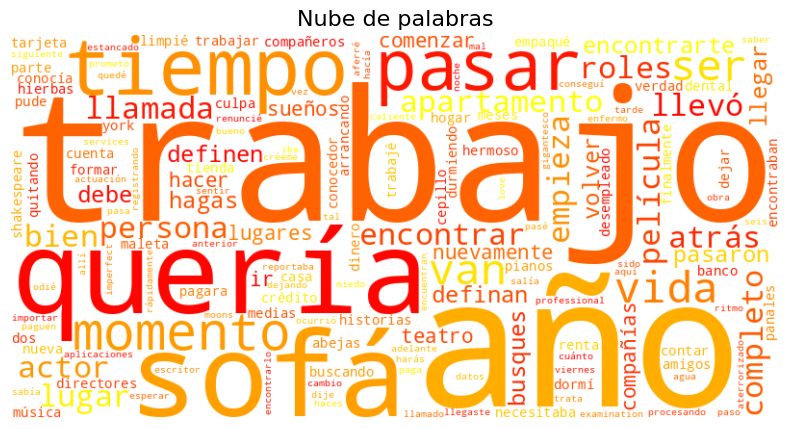

In [52]:

# Paso 2: limpiar el texto usando expresiones regulares
texto_limpio = re.sub(r'[^\w\s]', '', texto_completo.lower())

# Paso 3: dividir en palabras
palabras = texto_limpio.split()

# Paso 4a: buscar cuáles palabras son stopwords
stopwords_encontradas = [palabra for palabra in palabras if palabra in stopwords_es]

# Paso 4b: buscar cuáles palabras NO son stopwords
palabras_importantes = [palabra for palabra in palabras if palabra not in stopwords_es]

# Paso 5: mostrar resultados ordenados en varias columnas
def mostrar_en_columnas(lista_palabras, columnas=4):
    lista_ordenada = sorted(set(lista_palabras))
    # Rellenar la lista para que sea múltiplo de columnas
    while len(lista_ordenada) % columnas != 0:
        lista_ordenada.append('')
    matriz = [lista_ordenada[i::columnas] for i in range(columnas)]
    df = pd.DataFrame(matriz).transpose()
    print(df.to_string(index=False, header=False))

print("="*70)
print("Stopwords encontradas en el texto (ordenadas en columnas):")
print("="*70)
mostrar_en_columnas(stopwords_encontradas, columnas=4)

print("="*70)
print("Palabras que NO son stopwords (contenido real, ordenadas en columnas):")
print("="*70)
mostrar_en_columnas(palabras_importantes, columnas=4)
print("="*70)

# Paso 6: Crear la nube de palabras
# Unimos las palabras importantes en un solo string separado por espacios
texto_final = ' '.join(palabras_importantes)

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='autumn').generate(texto_final)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras', fontsize=16)
plt.show()


### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [50]:

# Eliminar signos raros (pero conservamos puntos, signos de fin de oración)
texto_con_puntos = re.sub(r'[^\w\s\.\!\?]', '', texto_completo.lower())

# 2. Dividir en oraciones manualmente

oraciones_brutas = re.split(r'[.!?]+', texto_con_puntos)
oraciones_brutas = [o.strip() for o in oraciones_brutas if o.strip() != ""]

# 3. Limpiar cada oración: eliminar stopwords

oraciones_limpias = []
for oracion in oraciones_brutas:
    palabras = oracion.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_es]
    oracion_limpia = ' '.join(palabras_filtradas)
    oraciones_limpias.append(oracion_limpia)

# 4. Armar la matriz documento-vocabulario

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(oraciones_limpias)

matriz_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("\nMatriz Documento-Vocabulario:")
matriz_df



Matriz Documento-Vocabulario:


,10,13,29,abejas,actor,actuación,adelante,aferré,agua,allí,...,trabajo,trabajé,trata,van,verdad,vez,vida,viernes,volver,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,2,1,0,0,1,0,0,0,0,0



#### 2.3.2 Determina la longitud de tu vocabulario.

In [46]:

# Calcular la longitud del vocabulario
vocabulario = vectorizer.get_feature_names_out()
print("\nVocabulario encontrado:", list(vocabulario))
print("\nLongitud del vocabulario:", len(vocabulario))



Vocabulario encontrado: ['10', '13', '29', 'abejas', 'actor', 'actuación', 'adelante', 'aferré', 'agua', 'ahora', 'alguna', 'allí', 'amigos', 'anterior', 'apartamento', 'apartamentos', 'aplicaciones', 'aquí', 'arrancando', 'así', 'aterrorizado', 'atrás', 'año', 'años', 'banco', 'bien', 'bueno', 'buscando', 'busques', 'caliente', 'cambio', 'casa', 'casi', 'cepillo', 'comenzar', 'compañeros', 'compañías', 'completo', 'conocedor', 'conocía', 'conseguí', 'contar', 'crédito', 'créeme', 'cuenta', 'culpa', 'cuánto', 'datos', 'debe', 'definan', 'definen', 'dejando', 'dejar', 'dental', 'desempleado', 'después', 'dije', 'dinero', 'directores', 'dormí', 'dos', 'durmiendo', 'empaqué', 'empieza', 'empiezas', 'encontraban', 'encontrar', 'encontrarlo', 'encontrarte', 'encuentran', 'enfermo', 'escritor', 'esperar', 'estancado', 'examination', 'finalmente', 'formar', 'gigantesco', 'hacer', 'haces', 'hacía', 'hagas', 'harás', 'hermoso', 'hierbas', 'historias', 'hogar', 'iba', 'imperfect', 'importar', '


#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Aplicar TF-IDF

tfidf_vectorizer = TfidfVectorizer()

# Lo aplicamos sobre las mismas oraciones limpias
X_tfidf = tfidf_vectorizer.fit_transform(oraciones_limpias)

# Mostramos el TF-IDF como DataFrame para verlo mejor
matriz_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\nMatriz Documento-Vocabulario con TF-IDF:")
matriz_tfidf_df



Matriz Documento-Vocabulario con TF-IDF:


,10,13,29,abejas,actor,actuación,adelante,aferré,agua,allí,...,trabajo,trabajé,trata,van,verdad,vez,vida,viernes,volver,york
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413731,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.505693,0.000000,0.000000,0.000000,0.000000,0.252847,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271903,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218218
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.257423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.181442,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.232434,0.181442,0.000000,0.000000,0.181442,0.000000,0.000000,0.000000,0.000000,0.000000


# Conclusiones

A partir de este trabajo, pudimos reducir el ruido del texto y focalizarnos en las palabras clave que representan su verdadero contenido.
La aplicación de TF-IDF nos permitió identificar qué palabras son más importantes en cada oración, brindando la posibilidad de realizar resúmenes automáticos o detectar temas principales de manera más precisa.

# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [ ]:
# instalar wordcloud
!pip install wordcloud


In [ ]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

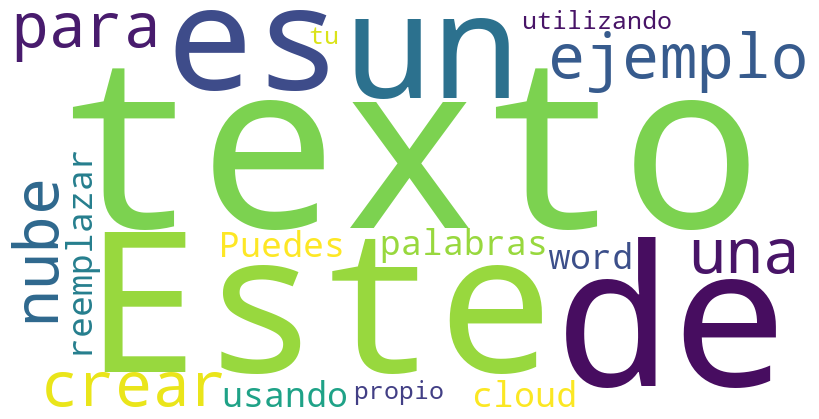

In [ ]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



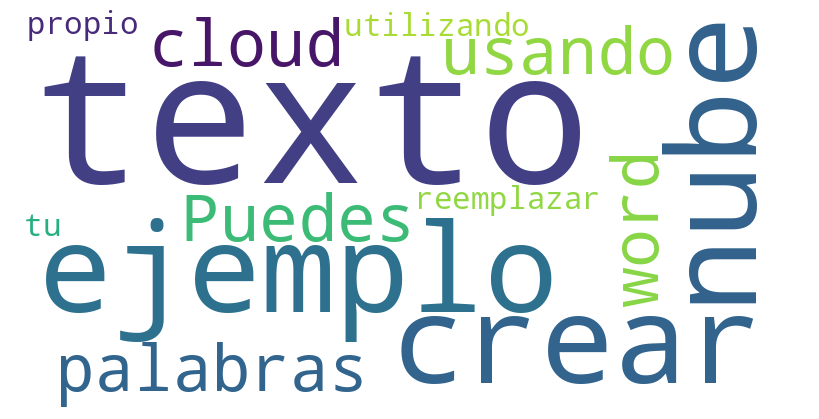

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
